# Load Data Set

In [1]:
# Import TensorFlow and load the MNIST dataset
from tensorflow.keras.datasets import mnist

# Load data into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print confirmation
print("✅ MNIST dataset loaded successfully!")
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
✅ MNIST dataset loaded successfully!
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


# Check Dataset Shapes & Basic Info

In [3]:
# Check the shapes of training and testing data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
# Check a single image
print("\nExample image pixel values (first image):")
print(x_train[0])  # Pixel intensity values


Example image pixel values (first image):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0

In [5]:
print("\nLabel for the first image:", y_train[0])


Label for the first image: 5


# Visualize Sample Images

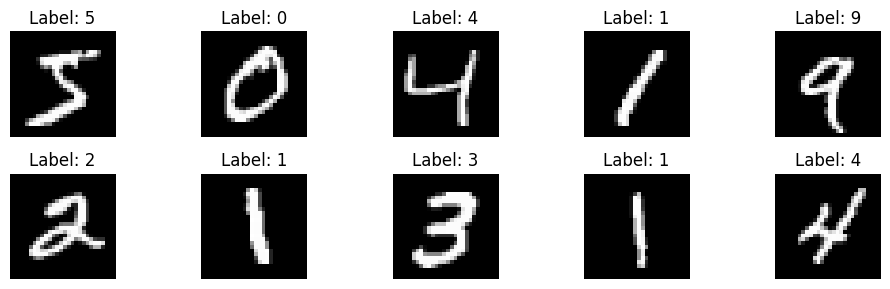

In [6]:
import matplotlib.pyplot as plt

# Plot 10 sample images from training data
plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Understand Train/Test Split

In [7]:
# Confirm counts of training and testing images
print("Number of training samples:", len(x_train))
print("Number of testing samples:", len(x_test))

# Example difference
print("\nExample of a training label:", y_train[0])
print("Example of a test label:", y_test[0])

Number of training samples: 60000
Number of testing samples: 10000

Example of a training label: 5
Example of a test label: 7
